In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
claims = pd.read_csv(r'./Assessment 1 Data Files/tsa_claims2.csv')
claims.head()

c:\Users\TSHIAMO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


# Examine the data

In [178]:
claims.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 170.3 MB


In [179]:
claims.nunique(dropna=False)

Claim Number     204258
Date Received      4008
Incident Date     26808
Airport Code        466
Airport Name        486
Airline Name        319
Claim Type           12
Claim Site            7
Item               4705
Claim Amount      36118
Status               16
Close Amount      17163
Disposition           4
dtype: int64

In [180]:
claims.apply(pd.unique)

Claim Number     [0909802M, 0202417M, 0202445M, 0909816M, 20050...
Date Received    [4-Jan-02, 2-Feb-02, 4-Feb-02, 7-Feb-02, 18-Fe...
Incident Date    [12/12/2002 0:00, 1/16/2004 0:00, 11/26/2003 0...
Airport Code     [EWR, SEA, STL, MIA, MCO, CAK, PHL, BWI, PHX, ...
Airport Name     [Newark International Airport, Seattle-Tacoma ...
Airline Name     [Continental Airlines, nan, American Airlines,...
Claim Type       [Property Damage, Passenger Property Loss, nan...
Claim Site       [Checkpoint, Checked Baggage, Other, Motor Veh...
Item             [Other, Luggage (all types including footlocke...
Claim Amount     [$350.00 , $100.00 , $278.88 , $50.00 , $84.79...
Status           [Approved, Settled, Canceled, Denied, Insuffic...
Close Amount     [$350.00 , $50.00 , $227.92 , $84.79 , $227.00...
Disposition                   [Approve in Full, Settle, nan, Deny]
dtype: object

# Cleaning the Data

In [181]:
# Changing Date columns to DateTime data type
date_cols = ['Incident Date', 'Date Received']
claims[date_cols] = claims[date_cols].apply(pd.to_datetime, errors='coerce')
claims[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Incident Date  201920 non-null  datetime64[ns]
 1   Date Received  204004 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


In [182]:
#Removing White Spaces from Column Names
claims.columns = claims.columns.str.replace(' ', '')
claims.head()

,ClaimNumber,DateReceived,IncidentDate,AirportCode,AirportName,AirlineName,ClaimType,ClaimSite,Item,ClaimAmount,Status,CloseAmount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [183]:
# Removing $ sign on ClaimAmount and Close Amount, then saving them as floats
currency_cols = ['ClaimAmount', 'CloseAmount']

#Removing the $ sign
claims[currency_cols] = claims[currency_cols].replace('[\$,]', '', regex=True)

#Convert to numeric and drop rows with NaN values
claims[currency_cols] = claims[currency_cols].apply(pd.to_numeric, errors='coerce')
claims = claims.dropna(subset=currency_cols)

# Change the type to float
claims[currency_cols] = claims[currency_cols].astype(float, errors='ignore')
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116745 entries, 0 to 145141
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimNumber   116745 non-null  object        
 1   DateReceived  116649 non-null  datetime64[ns]
 2   IncidentDate  116309 non-null  datetime64[ns]
 3   AirportCode   112980 non-null  object        
 4   AirportName   112980 non-null  object        
 5   AirlineName   91349 non-null   object        
 6   ClaimType     111916 non-null  object        
 7   ClaimSite     116512 non-null  object        
 8   Item          114297 non-null  object        
 9   ClaimAmount   116745 non-null  float64       
 10  Status        116745 non-null  object        
 11  CloseAmount   116745 non-null  float64       
 12  Disposition   112808 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 12.5+ MB


In [184]:
#getting the Airport data to fill in the missing data
airports = pd.read_csv(r'./Assessment 1 Data Files/GlobalAirportDatabase.csv')
airports.head()

,ICAOCode,IATACode,AirportName,City,Country,LatitudeDegrees,LatitudeMinutes,LatitudeSeconds,LatitudeDir,LongitudeDegrees,LongitudeMinutes,LongitudeSeconds,LongitudeDirection,Altitude,LatitudeDecimalDegrees,LongitudeDecimalDegrees
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726


In [185]:

# Getting Airport Code values (except nulls) from claims DataFrame
claims_airportCodes = claims[claims['AirportCode'].notnull()]

# Combined airport codes and IATACodes and AirportNames from airports DataFrame, so we can match and fill missing information based on AirportCode
merged = pd.merge(claims_airportCodes, airports[['IATACode', 'AirportName']], 
                          how='left', left_on='AirportCode', right_on='IATACode')

# Fill missing AirportName in claims based on AirportCode. AirportName_y is the column name of AirportName from airports DataFrame
claims['AirportName'] = claims['AirportName'].fillna(
    merged_df_code['AirportName_y'] 
)

claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116745 entries, 0 to 145141
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimNumber   116745 non-null  object        
 1   DateReceived  116649 non-null  datetime64[ns]
 2   IncidentDate  116309 non-null  datetime64[ns]
 3   AirportCode   112980 non-null  object        
 4   AirportName   116525 non-null  object        
 5   AirlineName   91349 non-null   object        
 6   ClaimType     111916 non-null  object        
 7   ClaimSite     116512 non-null  object        
 8   Item          114297 non-null  object        
 9   ClaimAmount   116745 non-null  float64       
 10  Status        116745 non-null  object        
 11  CloseAmount   116745 non-null  float64       
 12  Disposition   112808 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 12.5+ MB


In [186]:
# getting rows where AirportCode is missing, but AirportName is available
claims_airportNames = claims[claims['AirportCode'].isnull() & claims['AirportName'].notnull()]

# Combined AirportNames(from clims) and IATACodes and AirportNames from airports DataFrame, so we can match and fill missing information based on AirportName (from airports)
merged_df_name = pd.merge(claims_airportNames, airports[['IATACode', 'AirportName']], 
                          how='left', left_on='AirportName', right_on='AirportName')

# Fill missing AirportCode in claims based on IATACode from airports dataFrame
claims['AirportCode'] = claims['AirportCode'].fillna(
    merged_df_name['IATACode']
)

claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116745 entries, 0 to 145141
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimNumber   116745 non-null  object        
 1   DateReceived  116649 non-null  datetime64[ns]
 2   IncidentDate  116309 non-null  datetime64[ns]
 3   AirportCode   113230 non-null  object        
 4   AirportName   116525 non-null  object        
 5   AirlineName   91349 non-null   object        
 6   ClaimType     111916 non-null  object        
 7   ClaimSite     116512 non-null  object        
 8   Item          114297 non-null  object        
 9   ClaimAmount   116745 non-null  float64       
 10  Status        116745 non-null  object        
 11  CloseAmount   116745 non-null  float64       
 12  Disposition   112808 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 12.5+ MB


In [187]:
#I assume ClaimNumber is the identifier (Primary Key), so I will check for duplicates (There should be no duplicates)
claims.duplicated(subset=['ClaimNumber']).sum()


0

# Task 1
###  What is the most common type of insurance claim?


In [188]:
#Checking the ClaimType column
claims['ClaimType'].value_counts(dropna=False)

Passenger Property Loss    65238
Property Damage            45708
NaN                         4829
Employee Loss (MPCECA)       389
Passenger Theft              379
Personal Injury              147
Motor Vehicle                 55
Name: ClaimType, dtype: int64

[Text(0.5, 1.0, 'Types of Insurance Claims')]

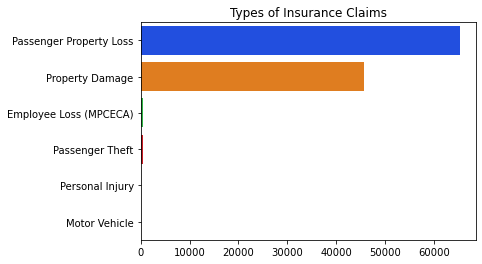

In [197]:
#excluding Null values to find the most common type of insurance claim
claim_type = claims['ClaimType'].value_counts(dropna=True)

#plotting a barplot
ax = sns.barplot(y=claim_type.index, x=claim_type.values, palette='bright')
#Adding the title
ax.set(title = 'Types of Insurance Claims')

# Task 2
### Which claim site within the airport are claims most commonly filed for?

In [199]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116745 entries, 0 to 145141
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimNumber   116745 non-null  object        
 1   DateReceived  116649 non-null  datetime64[ns]
 2   IncidentDate  116309 non-null  datetime64[ns]
 3   AirportCode   113230 non-null  object        
 4   AirportName   116525 non-null  object        
 5   AirlineName   91349 non-null   object        
 6   ClaimType     111916 non-null  object        
 7   ClaimSite     116512 non-null  object        
 8   Item          114297 non-null  object        
 9   ClaimAmount   116745 non-null  float64       
 10  Status        116745 non-null  object        
 11  CloseAmount   116745 non-null  float64       
 12  Disposition   112808 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 12.5+ MB


In [198]:
claims['ClaimSite'].value_counts(dropna=False)

Checked Baggage    95770
Checkpoint         19836
Other                843
NaN                  233
Motor Vehicle         62
Bus Station            1
Name: ClaimSite, dtype: int64

In [200]:
claims.nunique(dropna=False)

ClaimNumber     116745
DateReceived      2082
IncidentDate      3944
AirportCode        423
AirportName        559
AirlineName        189
ClaimType            7
ClaimSite            6
Item              2520
ClaimAmount      24692
Status               5
CloseAmount      14522
Disposition          4
dtype: int64

[Text(0.5, 1.0, 'Most Common Claim Site'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Claim Site')]

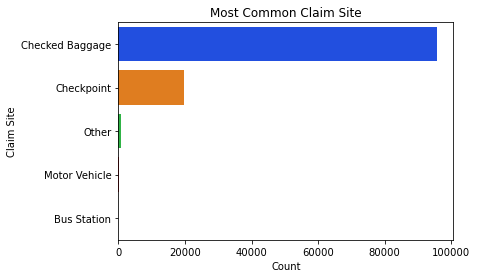

In [211]:
#excluding Null values to find the most common type of insurance claim
claim_site = claims['ClaimSite'].value_counts(dropna=True)

#plotting a barplot
ax = sns.barplot(y=claim_site.index, x=claim_site.values, palette='bright', orient='h')
#Adding the title
ax.set(title = 'Most Common Claim Site', xlabel='Count', ylabel='Claim Site')